In [1]:
import pandas as pd

In [2]:
# grants_legacy = pd.read_csv('./tiger_grants-14.csv')

# grants_legacy.drop(['Unnamed: 11', 'Location Precision'], axis=1, inplace=True)


# grants_legacy.columns = grants_legacy.columns.str.strip()

def clean_amount(data, col='Amount'):
    data[col] = data[col].str.strip('$').replace('?', '0')
    data[col] = data[col].str.replace(',', '')
    data[col] = data[col].astype('float')
    return data

# grants_legacy = clean_amount(grants_legacy)

# TODO convert lat/long to point, obtain shapefile of US entity boundaries, derive state/entity values

# grants_legacy.Round.value_counts()

In [3]:
grants_16 = pd.read_csv('tiger_grants_2016.csv')
grants_16 = grants_16.rename(columns={' Amount ': 'Amount',
                                      'Capital vs Planning':'cap_plan',
                                      'Location 1': 'coord'
                                     })
grants_16.drop('Location Precision', axis=1, inplace=True)
grants_16['Round'] = pd.to_datetime(grants_16.Round).dt.year
grants_16

,Modal Administration,Urban/Rural,Project Name,Applicant,Round,cap_plan,Project Type,Project Description,Amount,coord
0,FTA,Urban,Green Fleet Procurement,Regional Transportation Commission of Southern...,2016,Capital,Transit,The project will replace diesel transit buses ...,13324000.0,"(36.1823, -115.1645)"
1,FHWA,Rural,Downtown Dahlonega Complete Streets Corridor I...,City of Dahlonega,2014,Capital,Road,The project would create Complete Streets to b...,5100000.0,"(34.529753, -83.984814)"
2,FHWA,Urban,Re-Connecting Cleveland: Pathways to Opportunity,Cleveland Metropolitan Park District,2016,Capital,Road,The project will construct approximately 4 mil...,7950000.0,"(41.4921, -81.6709)"
3,FHWA,Urban,Hollister Avenue Complete Streets Corridor Plan,City of Goleta,2014,Planning,Road,The Hollister Avenue Complete Streets Corridor...,236000.0,"(34.433178, -119.840369)"
4,FHWA,Urban,18th Street Viaduct Planning Project,"City of Sioux City, Iowa",2014,Planning,Road,The 18th Street Viaduct Planning Project will ...,1000000.0,"(42.504993, -96.393464)"
...,...,...,...,...,...,...,...,...,...,...
416,MARAD,Rural,Gordon A. Finch Terminal Improvements,Virgin Islands Port Authority,2016,Capital,Maritime,The project will renovate and reconstruct a ro...,10666878.0,"(17.7331, -64.7681)"
417,FHWA,Urban,North Interstate 25 Phase 1,Colorado Department of Transportation,2016,Capital,Road,The project will improve an approximately 14-m...,15000000.0,"(40.4983, -104.9932)"
418,MARAD,Rural,Port of Newport International Terminal Shippin...,Port of Newport,2015,Capital,Maritime,The Port of Newport International Terminal Shi...,2000000.0,"(44.6762, -124.0146)"
419,FHWA,Rural,BIA Route 7 to US Highway 83 Improvement Project,Rosebud Sioux Tribe,2016,Capital,Road,The project will reconstruct approximately 16 ...,14620000.0,"(43.2548, -100.8743)"


In [4]:
def load_applicants():
    applicants = pd.read_csv('./applicants.csv')
    applicants['Grant'] = applicants.Round
    applicants['Round'] = applicants.Round.str[-4:].astype('int')
    applicants['State'] = applicants.State.str.strip()
    applicants = clean_amount(applicants, col='Funding Request')
    applicants = clean_amount(applicants, col='Project Cost')
    return applicants
applicants = load_applicants()

In [5]:
# TODO define share of population / maybe tax revenue for each state entity, add button for those that exceed this number in either apps or grants
applicant_entities = list(applicants.State.unique())

In [6]:
applicants.loc[applicants.State == 'District of Columbia']

,Round,Project Name,Applicant Name,State,City,Project Type,Urban / Rural,Funding Request,Project Cost,Applicant Type,Grant
263,2009,AMTRAK FLEET OVERHAUL PROGRAM,Amtrak,District of Columbia,Washington,Rail,Urban,300000000.0,3.000000e+08,State Govt.,TIGER 2009
264,2009,Amtrak Positive Train Control Program,Amtrak,District of Columbia,Washington,Rail,Urban/Rural,63000000.0,6.300000e+07,Transit Agency,TIGER 2009
265,2009,DULLES CORRIDOR METRORAIL PROJECT/WIEHLE AVENU...,Metropolitan Washington Airports Authority,District of Columbia,Washington,Transit,Urban,90000000.0,2.632487e+09,Port Authority,TIGER 2009
266,2009,DULLES TOLL ROAD ORT CORRIDOR MOBILITY PROJECT,Metropolitan Washington Airports Authority,District of Columbia,Washington,Road,Urban,44100000.0,5.360000e+07,Port Authority,TIGER 2009
267,2009,I-495 / Dulles Airport Access Highway Intercha...,Metropolitan Washington Airports Authority,District of Columbia,Washington,Road,Urban,53400000.0,1.034000e+08,Transit agency,TIGER 2009
268,2009,Widening of Virginia State Route 606,Metropolitan Washington Airports Authority,District of Columbia,Washington,Road,Urban,40505000.0,6.250500e+07,Local Government (or political subdivision the...,TIGER 2009
269,2009,"Bus Transit, Bike-Sharing and Intermodal Conne...",Metropolitan Washington Council of Governments,District of Columbia,Washington,Transit,Urban,266718500.0,3.692185e+08,Metropolitan Planning Organization,TIGER 2009
270,2009,WMATA’s Regional Bus Facility Expansion and Mo...,Washington Metropolitan Area Transit Authority...,District of Columbia,Washington,Transit,Urban,98800000.0,2.084000e+08,State Government (or political subdivision the...,TIGER 2009
1675,2010,Anacostia Streetcar Initial Line Phase 2 Exten...,District of Columbia Department of Transportation,District of Columbia,Washington,Transit,Urban,16025000.0,3.205000e+07,State Govt.,TIGER 2010
1676,2010,National Gateway Phases II and III,District of Columbia Department of Transportation,District of Columbia,Washington,Planning,Urban/Rural,3000000.0,3.840000e+08,State Govt.,TIGER 2010


In [26]:
int(applicants['Funding Request'].quantile([.25, .75]))

TypeError: cannot convert the series to <class 'int'>

In [7]:
len(applicants[applicants.State == 'District of Columbia']) / len(applicants)

0.0028676771814829987

In [8]:
test_str = grants_16.coord.values[0]
test_str

'(36.1823, -115.1645)'

In [9]:
import re

def to_coords(coord_str):
    try:
        matches = re.search(r'\((\d{2}\.\d+),\s(-*\d+\.\d+)\)', coord_str)
        lat = float(matches.group(1))
        lon = float(matches.group(2))
        return (lat, lon)
    except:
        return 'failed'


grants_16['lat'], grants_16['lon'] = zip(*[to_coords(coord) for coord in list(grants_16.coord)])


grants_16
# to_coords([coord for coord in list(grants_16.coord)][0])

,Modal Administration,Urban/Rural,Project Name,Applicant,Round,cap_plan,Project Type,Project Description,Amount,coord,lat,lon
0,FTA,Urban,Green Fleet Procurement,Regional Transportation Commission of Southern...,2016,Capital,Transit,The project will replace diesel transit buses ...,13324000.0,"(36.1823, -115.1645)",36.182300,-115.164500
1,FHWA,Rural,Downtown Dahlonega Complete Streets Corridor I...,City of Dahlonega,2014,Capital,Road,The project would create Complete Streets to b...,5100000.0,"(34.529753, -83.984814)",34.529753,-83.984814
2,FHWA,Urban,Re-Connecting Cleveland: Pathways to Opportunity,Cleveland Metropolitan Park District,2016,Capital,Road,The project will construct approximately 4 mil...,7950000.0,"(41.4921, -81.6709)",41.492100,-81.670900
3,FHWA,Urban,Hollister Avenue Complete Streets Corridor Plan,City of Goleta,2014,Planning,Road,The Hollister Avenue Complete Streets Corridor...,236000.0,"(34.433178, -119.840369)",34.433178,-119.840369
4,FHWA,Urban,18th Street Viaduct Planning Project,"City of Sioux City, Iowa",2014,Planning,Road,The 18th Street Viaduct Planning Project will ...,1000000.0,"(42.504993, -96.393464)",42.504993,-96.393464
...,...,...,...,...,...,...,...,...,...,...,...,...
416,MARAD,Rural,Gordon A. Finch Terminal Improvements,Virgin Islands Port Authority,2016,Capital,Maritime,The project will renovate and reconstruct a ro...,10666878.0,"(17.7331, -64.7681)",17.733100,-64.768100
417,FHWA,Urban,North Interstate 25 Phase 1,Colorado Department of Transportation,2016,Capital,Road,The project will improve an approximately 14-m...,15000000.0,"(40.4983, -104.9932)",40.498300,-104.993200
418,MARAD,Rural,Port of Newport International Terminal Shippin...,Port of Newport,2015,Capital,Maritime,The Port of Newport International Terminal Shi...,2000000.0,"(44.6762, -124.0146)",44.676200,-124.014600
419,FHWA,Rural,BIA Route 7 to US Highway 83 Improvement Project,Rosebud Sioux Tribe,2016,Capital,Road,The project will reconstruct approximately 16 ...,14620000.0,"(43.2548, -100.8743)",43.254800,-100.874300


In [10]:
grants_16.iloc[375, :]

Modal Administration                                                MARAD
Urban/Rural                                                         Rural
Project Name                                  Rehabilitation of "H" Wharf
Applicant                                          Port Authority of Guam
Round                                                                2016
cap_plan                                                          Capital
Project Type                                                     Maritime
Project Description     The project will reconstruct and expand a whar...
Amount                                                              1e+07
coord                                                 (13.2746, 144.3955)
lat                                                               13.2746
lon                                                               144.395
Name: 375, dtype: object

In [11]:
grants_16.Amount.max()

105000000.0

<AxesSubplot:>

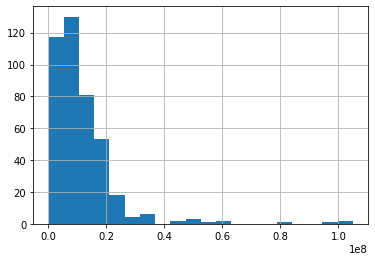

In [12]:
grants_16.Amount.hist(bins=20)

In [13]:
grants_16.loc[grants_16['Project Name'].isin(applicants['Project Name']), 'Project Name']

0                                Green Fleet Procurement
1      Downtown Dahlonega Complete Streets Corridor I...
2       Re-Connecting Cleveland: Pathways to Opportunity
3        Hollister Avenue Complete Streets Corridor Plan
4                   18th Street Viaduct Planning Project
                             ...                        
416                Gordon A. Finch Terminal Improvements
417                          North Interstate 25 Phase 1
418    Port of Newport International Terminal Shippin...
419     BIA Route 7 to US Highway 83 Improvement Project
420                         Live Oak Streetscape Project
Name: Project Name, Length: 197, dtype: object

In [14]:
applicants[applicants['Project Name'].str.contains('DART')]

,Round,Project Name,Applicant Name,State,City,Project Type,Urban / Rural,Funding Request,Project Cost,Applicant Type,Grant
538,2009,DART Sustainable Multi-Modal Transit Hub,Des Moines Regional Transit Authority,Iowa,Des Moines,Transit,Urban,16000000.0,22600000.0,Transit Agency,TIGER 2009
2772,2010,DART Regional Rail Vehicles,Dallas Area Rapid Transit,Texas,Dallas,Rail,Urban,20000000.0,25000000.0,Transit Agency,TIGER 2010
5823,2014,DART Planning for High Speed Rail(HSR) in Down...,Dallas Area Rapid Transit,Texas,Dallas,Planning,Urban,1100000.0,1500000.0,X: Other (specify),TIGER 2014


In [15]:
first_merge = grants_16.merge(applicants, left_on='Project Name', right_on='Project Name', how='left')

In [16]:
# first_merge[(first_merge.Round_x == first_merge.Round_y.astype('int'))]
first_merge['Round_y'] = first_merge.Round_y.apply(lambda year: int(year) if year > 0 else 0)
first_merge[(first_merge.Round_x != first_merge.Round_y) & (first_merge.Round_y != 0)]

,Modal Administration,Urban/Rural,Project Name,Applicant,Round_x,cap_plan,Project Type_x,Project Description,Amount,coord,...,Round_y,Applicant Name,State,City,Project Type_y,Urban / Rural,Funding Request,Project Cost,Applicant Type,Grant
1,FHWA,Rural,Downtown Dahlonega Complete Streets Corridor I...,City of Dahlonega,2014,Capital,Road,The project would create Complete Streets to b...,5100000.0,"(34.529753, -83.984814)",...,2010,"City of Dahlonega, Georgia",Georgia,Dahlonega,Planning,Rural,720069.0,828068.0,Local Govt.,TIGER 2010
2,FHWA,Rural,Downtown Dahlonega Complete Streets Corridor I...,City of Dahlonega,2014,Capital,Road,The project would create Complete Streets to b...,5100000.0,"(34.529753, -83.984814)",...,2011,"City of Dahlonega, Georgia",Georgia,Dahlonega,Bicycle and Pedestrian,Rural,9975000.0,10500000.0,Local Govt.,TIGER 2011
3,FHWA,Rural,Downtown Dahlonega Complete Streets Corridor I...,City of Dahlonega,2014,Capital,Road,The project would create Complete Streets to b...,5100000.0,"(34.529753, -83.984814)",...,2013,Lumpkin County,Georgia,Dahlonega,Road,Rural,8810000.0,9524828.0,C: City or Township Government,TIGER 2013
5,FHWA,Rural,Downtown Dahlonega Complete Streets Corridor I...,City of Dahlonega,2014,Capital,Road,The project would create Complete Streets to b...,5100000.0,"(34.529753, -83.984814)",...,2015,"City of Dahlonega, Georgia",Georgia,Dahlonega,Road,Rural,3533302.0,3925895.0,C: City or Township Government,TIGER 2015
16,FHWA,Rural,Poplar Airport Redevelopment and Regional Acce...,Assiniboine & Sioux Tribes of the Fort Peck Re...,2014,Planning,Road,The Poplar Airport Redevelopment and Regional ...,692829.0,"(48.115701, -105.184371)",...,2015,Fort Peck Assiniboine Sioux Tribes,Montana,Poplar,Road,Rural,12739373.0,14449373.0,I: Indian/Native American Tribal Government (F...,TIGER 2015
17,FHWA,Rural,Poplar Airport Redevelopment and Regional Acce...,Assiniboine & Sioux Tribes of the Fort Peck Re...,2014,Planning,Road,The Poplar Airport Redevelopment and Regional ...,692829.0,"(48.115701, -105.184371)",...,2016,Fort Peck Assiniboine Sioux Tribes,Montana,Poplar,Road,Rural,11193338.0,11853338.0,I: Indian/Native American Tribal Government (F...,TIGER 2016
18,FHWA,Rural,Poplar Airport Redevelopment and Regional Acce...,Assiniboine & Sioux Tribes of the Fort Peck Re...,2014,Planning,Road,The Poplar Airport Redevelopment and Regional ...,692829.0,"(48.115701, -105.184371)",...,2017,"Assiniboine and Sioux Tribes, Fort Peck Indian...",Montana,Poplar,Road,Rural,9076900.0,12376900.0,I: Indian/Native American Tribal Government (F...,TIGER 2017
19,FHWA,Rural,Poplar Airport Redevelopment and Regional Acce...,Assiniboine & Sioux Tribes of the Fort Peck Re...,2014,Planning,Road,The Poplar Airport Redevelopment and Regional ...,692829.0,"(48.115701, -105.184371)",...,2018,Fort Peck Assiniboine & Sioux Tribes,Montana,Poplar,Road,Rural,2077376.0,2967680.0,I: Indian/Native American Tribal Government (F...,BUILD 2018
20,FHWA,Rural,Poplar Airport Redevelopment and Regional Acce...,Assiniboine & Sioux Tribes of the Fort Peck Re...,2014,Planning,Road,The Poplar Airport Redevelopment and Regional ...,692829.0,"(48.115701, -105.184371)",...,2019,"Assiniboine and Sioux Tribes, Fort Peck Indian...",Montana,Poplar,Road,Rural,2118924.0,3027034.0,I: Indian/Native American Tribal Government (F...,BUILD 2019
73,MARAD,Urban,South Hudson Intermodal Facility,"City of Bayonne, NJ",2012,Capital,Port,TIGER funds will expand the capacity of the la...,11400000.0,"(40.671727, -74.076852)",...,2011,"City of Bayonne, New Jersey",New Jersey,Bayonne,Freight Rail,Urban,13400000.0,22400000.0,Local Govt.,TIGER 2011


In [17]:
merge_failures = first_merge[first_merge.Round_y.isna()]
merge_failures

,Modal Administration,Urban/Rural,Project Name,Applicant,Round_x,cap_plan,Project Type_x,Project Description,Amount,coord,...,Round_y,Applicant Name,State,City,Project Type_y,Urban / Rural,Funding Request,Project Cost,Applicant Type,Grant


In [18]:
merge_failures[merge_failures.Round_x == 2016]

,Modal Administration,Urban/Rural,Project Name,Applicant,Round_x,cap_plan,Project Type_x,Project Description,Amount,coord,...,Round_y,Applicant Name,State,City,Project Type_y,Urban / Rural,Funding Request,Project Cost,Applicant Type,Grant


In [19]:
applicants[applicants['Project Name'].str.contains('Natchez')]

,Round,Project Name,Applicant Name,State,City,Project Type,Urban / Rural,Funding Request,Project Cost,Applicant Type,Grant
6264,2015,Natchez Railway's Bridge Rehabilitation and At...,"City of Natchez, Mississippi",Mississippi,Natchez,Freight Rail,Rural,11444160.0,14305200.0,C: City or Township Government,TIGER 2015
6858,2016,Natchez Railway's Bridge Rehabilitation & At-G...,"City of Natchez, Mississippi",Mississippi,Natchez,Freight Rail,Rural,10728900.0,14305200.0,C: City or Township Government,TIGER 2016
7357,2017,Natchez River Cruise Docking Facility Project,"City of Natchez, Mississippi",Mississippi,Natchez,Maritime,Rural,11190000.0,13540000.0,C: City or Township Government,TIGER 2017
7993,2018,Natchez River Cruise Docking Facility,"City of Natchez, Mississippi",Mississippi,Natchez,Maritime,Rural,11232000.0,14040000.0,C: City or Township Government,BUILD 2018
7995,2018,Natchez Trace Trails,"City of Tupelo, Mississippi",Mississippi,Tupelo,Road,Rural,2353840.0,2353840.0,C: City or Township Government,BUILD 2018
8792,2019,Natchez River Cruise Docking Facility,City of Natchez,Mississippi,Natchez,Maritime,Rural,7596960.0,9496200.0,C: City or Township Government,BUILD 2019
9426,2020,Natchez River Cruise Docking Facility,"City of Natchez, Mississippi",Mississippi,Natchez,Maritime,Rural,10186124.0,10186124.0,C: City or Township Government,BUILD 2020


In [20]:
dmv_apps = applicants[applicants.State.isin(['District of Columbia', 'Virginia', 'Maryland'])]
dmv_apps

,Round,Project Name,Applicant Name,State,City,Project Type,Urban / Rural,Funding Request,Project Cost,Applicant Type,Grant
263,2009,AMTRAK FLEET OVERHAUL PROGRAM,Amtrak,District of Columbia,Washington,Rail,Urban,300000000.0,3.000000e+08,State Govt.,TIGER 2009
264,2009,Amtrak Positive Train Control Program,Amtrak,District of Columbia,Washington,Rail,Urban/Rural,63000000.0,6.300000e+07,Transit Agency,TIGER 2009
265,2009,DULLES CORRIDOR METRORAIL PROJECT/WIEHLE AVENU...,Metropolitan Washington Airports Authority,District of Columbia,Washington,Transit,Urban,90000000.0,2.632487e+09,Port Authority,TIGER 2009
266,2009,DULLES TOLL ROAD ORT CORRIDOR MOBILITY PROJECT,Metropolitan Washington Airports Authority,District of Columbia,Washington,Road,Urban,44100000.0,5.360000e+07,Port Authority,TIGER 2009
267,2009,I-495 / Dulles Airport Access Highway Intercha...,Metropolitan Washington Airports Authority,District of Columbia,Washington,Road,Urban,53400000.0,1.034000e+08,Transit agency,TIGER 2009
...,...,...,...,...,...,...,...,...,...,...,...
9705,2020,Route 606 Widening,Spotsylvania County,Virginia,Spotsylvania,Road,Rural,3197823.0,1.116680e+07,B: County Government,BUILD 2020
9706,2020,US Route 1 Revitalization/Four Mile Fork Multi...,Spotsylvania County,Virginia,Spotsylvania,Road,Rural,1412160.0,1.765200e+06,B: County Government,BUILD 2020
9707,2020,Stafford County Transportation Master Plan,Stafford County,Virginia,Stafford,Road,Rural,300000.0,3.000000e+05,B: County Government,BUILD 2020
9708,2020,Charlottesville Regional Multimodal Transporta...,Thomas Jefferson Planning District Commission,Virginia,Charlottesville,Rail,Rural,711966.0,7.119660e+05,E: Regional Organization,BUILD 2020


In [21]:
recipients = sorted(grants_16['Applicant'].unique())

In [22]:
dmv_names = dmv_apps['Applicant Name'].unique()

# sorted(
grants_16[grants_16.Applicant.isin(dmv_names)]#.Applicant.unique())

,Modal Administration,Urban/Rural,Project Name,Applicant,Round,cap_plan,Project Type,Project Description,Amount,coord,lat,lon
9,FHWA,Urban,Hull Street Corridor Revitalization,"City of Richmond, Virginia",2010,Planning,Planning,Richmond and Chesterfield will develop an inte...,100000.0,"(37.539474, -77.432445)",37.539474,-77.432445
77,FTA,Urban,Broad Street Bus Rapid Transit,Greater Richmond Transit Company (GRTC),2014,Capital,Transit,The Broad Street Bus Rapid Transit Project wil...,24900000.0,"(37.617495, -77.524338)",37.617495,-77.524338
113,MARAD\n(FHWA Consult),Urban,Norfolk International Terminals,Virginia Port Authority,2014,Capital,Maritime,The project includes the construction of a 22-...,15000000.0,"(36.931484, -76.326787)",36.931484,-76.326787
129,FRA,Urban,Long Bridge NEPA Documentation,District Department of Transportation,2014,Planning,Freight Rail,The Long Bridge National Environmental Policy ...,2800000.0,"(38.874736, -77.038516)",38.874736,-77.038516
142,MARAD,Urban,Port of Baltimore Enhancements,Maryland Port Administration,2013,Capital,Port,TIGER funds will be used to expand the handlin...,10000000.0,"(39.245908, -76.557445)",39.245908,-76.557445
273,FHWA,Urban,Southeast Baltimore Port Industry Freight Corr...,City of Baltimore,2015,Capital,Road,The Southeast Baltimore Port Industry Freight ...,10000000.0,"(39.2824, -76.5407)",39.282400,-76.540700
316,FHWA,Urban,Fort Meade Multimodal Accessibility Project,Maryland State Highway Administration,2014,Capital,Road,The MD 175 Fort Meade Multimodal Accessibility...,10000000.0,"(39.113746, -76.726627)",39.113746,-76.726627
333,FHWA,Urban,Hanover Street Bridge Plan,City of Baltimore,2014,Planning,Road,The Hanover Street Bridge Multimodal Corridor ...,1100000.0,"(39.258841, -76.616077)",39.258841,-76.616077
408,FTA,Urban,US29 Bus Rapid Transit (BRT) Improvements,"Montgomery County, Maryland",2016,Capital,Transit,The project will implement an approximately 14...,10000000.0,"(39.0021, -77.036)",39.002100,-77.036000
415,FTA,Urban,North Avenue Rising,Maryland Department of Transportation,2016,Capital,Transit,The project will improve approximately five mi...,10000000.0,"(39.3096, -76.6388)",39.309600,-76.638800


In [23]:
recipients

['AVCP on behalf of Village of Alakanuk',
 'Alabama State Port Authority',
 'Alabama and Tennessee DOT',
 'Alaska Railroad Corporation',
 'Albany Port District Commission',
 'Ames Transit',
 'Anoka County',
 'Arizona DOT',
 'Arizona Department of Transportation',
 'Arkansas DOT',
 'Arkansas State Highway and Transportation Department',
 'Assiniboine & Sioux Tribes of the Fort Peck Reservation',
 'Augusta-Richmond County',
 'Bernalillo County',
 'Bi-State Development Agency',
 'Board of Commissioners of the Port of New Orleans',
 'Borough of Carlisle',
 'Broward Metropolitan Planning Organization',
 'Brownsville Navigation District',
 'CHAMPAIGN-URBANA MASS TRANSIT DISTRICT (INC)',
 'Caltrans',
 'Capital District Transportation Authority',
 'Capital Metropolitan Transportation Authority',
 'Center City District',
 'Central Oklahoma Transportation and Parking Authority (COTPA)',
 'Chicago Transit Authority',
 'City and County of Denver, Colorado-Community Planning and Development ',
 'Ci